<a href="https://colab.research.google.com/github/bingsen-wang/EE-Fundamentals/blob/main/ACWaveform.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><h1><b>AC Waveform: Amplitude, Phase and Freequency</h1></b>

Dr. Bingsen Wang

6/13/2023
</center>

#Python Code
The Python code illustrates a basic ac waveform. test a change

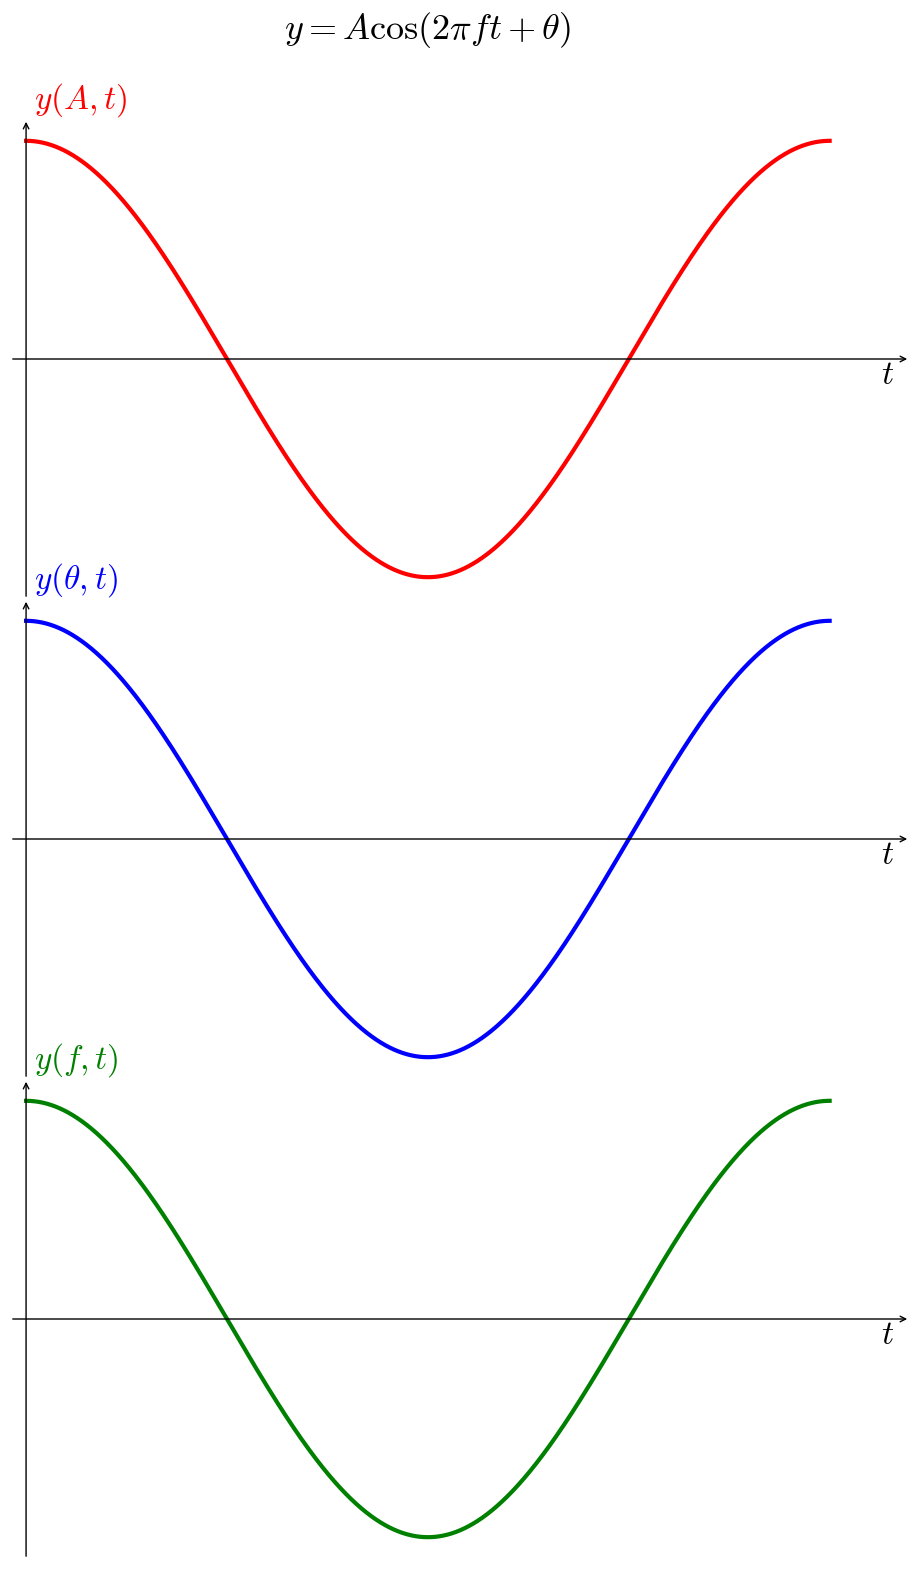

In [ ]:
import matplotlib
from os import linesep
from numpy import linspace,cos,pi
import matplotlib.pyplot as plt
from matplotlib import animation,rc
rc('animation', html='jshtml')
plt.rcParams.update({"font.family" : "serif","mathtext.fontset" : "cm"})

def y(A,theta,f,t):
  return A*cos(2*pi*f*t+theta)

#parameters
Nfpp=60
Nf = 2*Nfpp
A = linspace(1,.1,Nfpp).tolist()+linspace(.1,1,Nfpp).tolist()
f = linspace(1,10,Nfpp).tolist()+linspace(10,1,Nfpp).tolist()
theta=linspace(0,pi,Nfpp).tolist()+linspace(pi,0,Nfpp).tolist()
t=linspace(0,1,2048)


fig = plt.figure(figsize=(9,16))
fig.tight_layout()
ax_frame = [[[0,.6, 1, .3],[-.02,1.1],[-1.1,1.1]], #amplitude
            [[0,.3, 1, .3],[-.02,1.1],[-1.1,1.1]], #phase
            [[0,0, 1, .3],[-.02,1.1],[-1.1,1.1]], #frequency
            ]# [pos-boundary, xlim, ylim] for subplots
ax_lbl=[['$y(A,t)$', '$t$'],
        [r'$y(\theta,t)$', '$t$'],
        ['$y(f,t)$', '$t$'],
        ] #variables for yx axes of each subplot
clst=['r','b','g'] #colors of lines
ax_lst=[] #axis list or the list of subplots
lines = [] #array containing all the line segments
for k in range(len(ax_frame)):
  xn,xm,yn,ym = ax_frame[k][1]+ax_frame[k][2]
  ax=fig.add_axes(ax_frame[k][0],xlim=[xn,xm], ylim=[yn,ym],fc='none') #no fc
  ax.axis('off') #turn off axis frames
  ax_lst.append(ax)
  ax.annotate("", (xm, 0), (xn, 0),arrowprops={'arrowstyle':"->"}) #x-axis
  ax.annotate("", (0,ym), (0,yn),arrowprops={'arrowstyle':"->"}) #y-axis
  lines.append(ax.plot([], [], color=clst[k], lw=3)[0]) #lines to plot
  ax.text(xm-.02,0,ax_lbl[k][-1],size=24,va='top',ha='right') #x-axis label
  ax.text(0.01,ym,ax_lbl[k][0],size=24,va='bottom',color=clst[k]) #y label
ax_lst[0].text(0.5,ax_frame[0][2][1]+0.5,r'$y=A\cos(2\pi f t+\theta)$',va='top',ha='center',size=26)
# animation function. This is called sequentially
def animate(i):
  lines[0].set_data(t,y(A[i],theta[0],f[0],t))
  lines[1].set_data(t,y(A[0],theta[i],f[0],t))
  lines[2].set_data(t,y(A[0],theta[0],f[i],t))
  return

anim = animation.FuncAnimation(fig, animate, frames=Nf, interval=50)
# anim #uncomment to generate animation in the output area
# to save the animation, uncomment the following three lines
fn = r"ac_waveform.mp4"
writervideo = animation.FFMpegWriter(fps=24)
anim.save(fn, writer=writervideo,dpi = 120)
